# Project Development

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
data = pd.read_csv("saved_model/dataset/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### **1. Handle missing values**

In [110]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### 2.**Remove duplicate values**

In [112]:
# Remove duplicates values
data.duplicated().sum()

0

In [113]:
data.drop_duplicates(inplace=True)
# data.duplicated().sum()

#### **3.Remove unwanted column**

In [114]:
# Remove unnecessary columns
data.drop(labels=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [115]:
data.select_dtypes(include='object').columns

Index(['Geography', 'Gender'], dtype='object')

#### **4.Categorical columns**

In [116]:
categorical_cols = data.select_dtypes(include='object').columns
numerical_cols = data.select_dtypes(exclude='object').columns

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


Categorical Columns: Index(['Geography', 'Gender'], dtype='object')
Numerical Columns: Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [117]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### 5.Finding 

In [118]:
data.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [119]:
data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [120]:
data.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

#### 6.Correlation heatmap

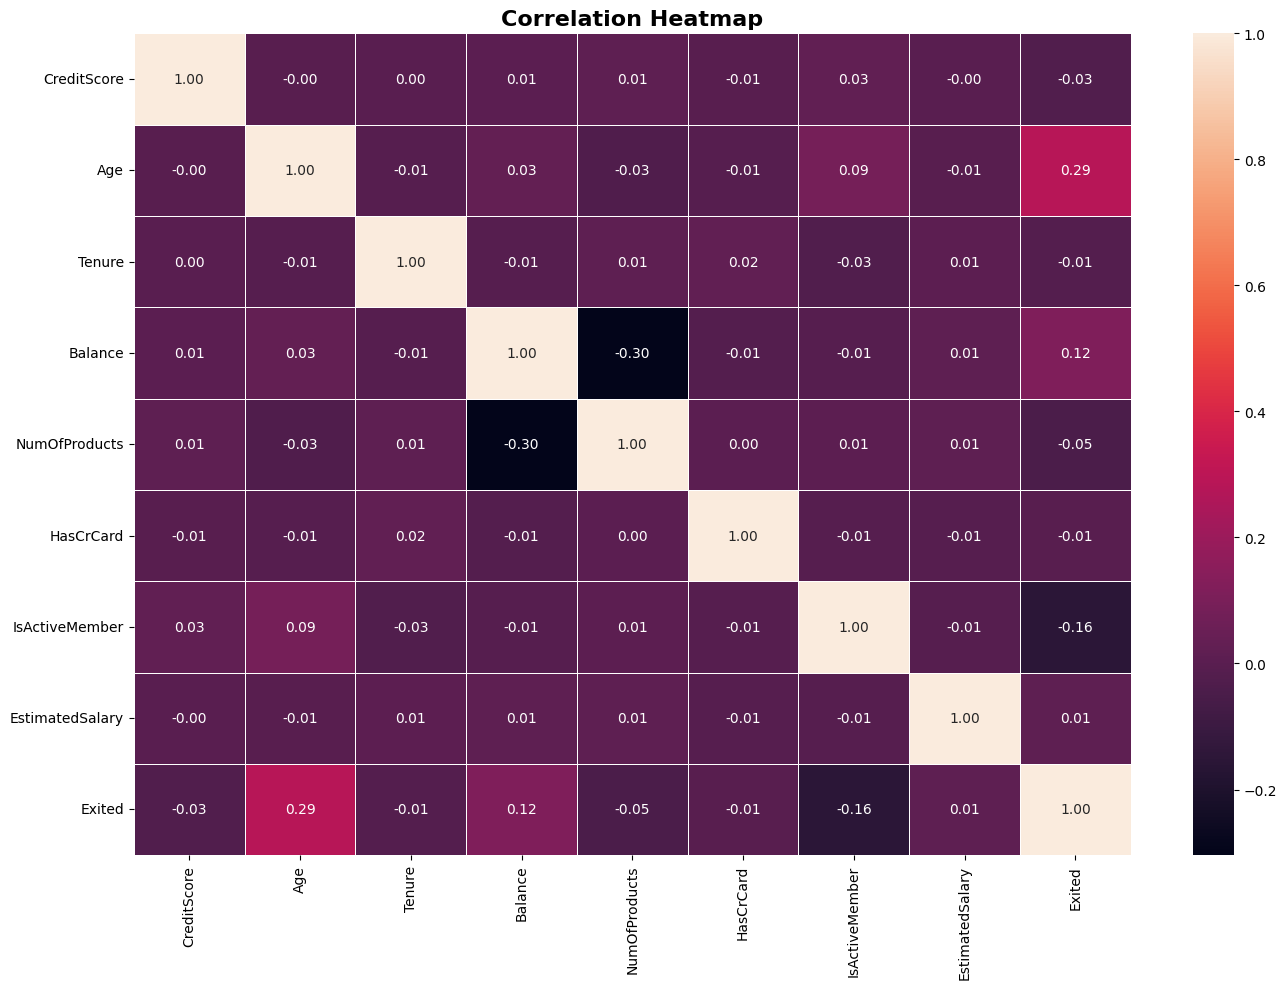

In [121]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
corr_matrix = data[numerical_cols].corr()

sns.heatmap(
    corr_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [122]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [123]:
# Dependent and Independent features
X = data.drop('Exited', axis=1)
y = data['Exited']

In [124]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [125]:
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


Categorical Columns: Index(['Geography', 'Gender'], dtype='object')
Numerical Columns: Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


#### **7.Feature Pipelinig**

In [126]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
# Pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [127]:
gender_cat = ['Female','Male']
geo_cat = ['France', 'Spain', 'Germany']

In [128]:
num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())])
cat_pipeline = Pipeline(steps=[
    ('ordinalencoder', OrdinalEncoder(categories=[geo_cat, gender_cat]))])
preprocessor = ColumnTransformer(
    [("num_pipeline", num_pipeline, numerical_cols),
    ("cat_pipeline", cat_pipeline, categorical_cols)]
)

In [129]:
#Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [130]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train), columns=numerical_cols.tolist() + categorical_cols.tolist())
X_test = pd.DataFrame(preprocessor.transform(X_test), columns=preprocessor.get_feature_names_out())

In [131]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography,Gender
0,0.356500,-0.655786,0.345680,-1.218471,0.808436,0.649203,0.974817,1.367670,0.0,1.0
1,-0.203898,0.294938,-0.348369,0.696838,0.808436,0.649203,0.974817,1.661254,2.0,1.0
2,-0.961472,-1.416365,-0.695393,0.618629,-0.916688,0.649203,-1.025834,-0.252807,1.0,1.0
3,-0.940717,-1.131148,1.386753,0.953212,-0.916688,0.649203,-1.025834,0.915393,0.0,0.0
4,-1.397337,1.625953,1.386753,1.057449,-0.916688,-1.540351,-1.025834,-1.059600,0.0,1.0


In [132]:
import pickle
with open('saved_model/preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

### **ANN IMPLEMENTATION**

In [133]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

In [134]:
X_train.shape[1],

(10,)

In [135]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1], )),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [136]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                704       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [137]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)


In [138]:
model.compile(optimizer=opt,
                 loss="binary_crossentropy", 
                 metrics=["accuracy"]
                 )

In [139]:
log_dir = "logs/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callbacks = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [140]:
## Early Stopping
early_stopping_callback = EarlyStopping(
    monitor="val_loss",  #validation loss
    patience=5,  # of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # restore weights from the epoch with the best validation loss
)

In [141]:
## Training the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    callbacks=[early_stopping_callback, tensorflow_callbacks]
)

Epoch 1/100
250/250 [==============================] - 2s 5ms/step - loss: 0.4561 - accuracy: 0.8062 - val_loss: 0.4013 - val_accuracy: 0.8300
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3877 - accuracy: 0.8426 - val_loss: 0.3585 - val_accuracy: 0.8520
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3549 - accuracy: 0.8545 - val_loss: 0.3459 - val_accuracy: 0.8580
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3463 - accuracy: 0.8595 - val_loss: 0.3500 - val_accuracy: 0.8570
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3410 - accuracy: 0.8601 - val_loss: 0.3433 - val_accuracy: 0.8570
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3373 - accuracy: 0.8614 - val_loss: 0.3523 - val_accuracy: 0.8555
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3352 - accuracy: 0.8609 - val_loss: 0.3428 - val_accuracy: 0.8555

In [142]:
model.save("model.h5")

c:\Users\manid\anaconda3\envs\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [143]:
loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

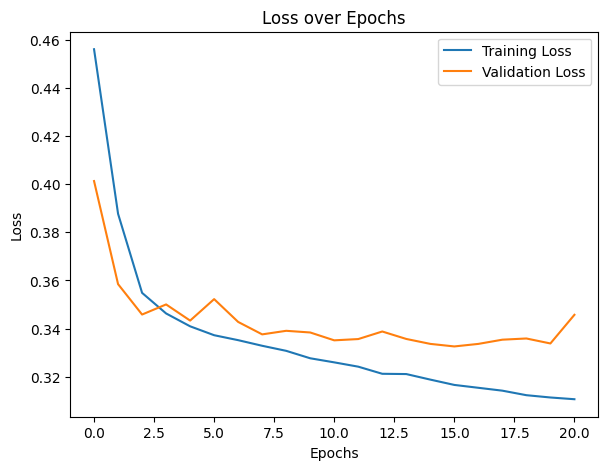

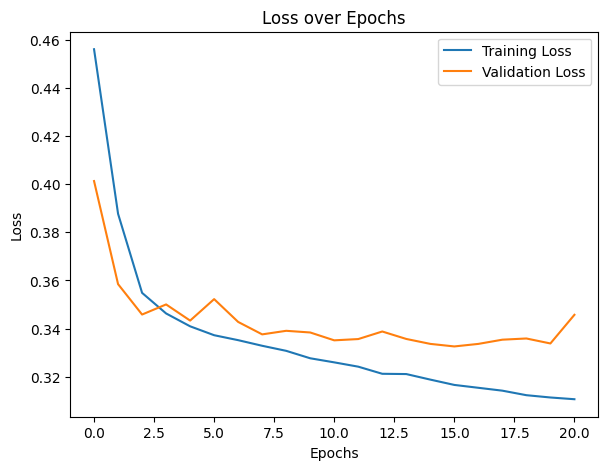

In [144]:
epochs = len(acc)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()



plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [145]:
## Load Tensorboard 
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [146]:
%tensorboard --logdir logs/

Reusing TensorBoard on port 6006 (pid 6824), started 0:00:57 ago. (Use '!kill 6824' to kill it.)